## CE670A Assignment4

In [2]:
pip install chart_studio

     |████████████████████████████████| 71kB 3.2MB/s 


### Import related packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.express as px
import scipy.signal as signal
from plotly.subplots import make_subplots
import copy

In [5]:
# Read the data
data = pd.read_csv("Data_monthly_1551.txt",
                   sep=";",
                   header=None)

data.columns = ["time", "tide", "missing data", "flag"]
# lets view the data
data.head(20)

time  tide  missing data  flag
0   1987.0417  6772             0     0
1   1987.1250  6856             0     0
2   1987.2083  6825             0     0
3   1987.2917  6837             0     0
4   1987.3750  6885             0     0
5   1987.4583  6892             0     0
6   1987.5417  6933             0     0
7   1987.6250  6999             0     0
8   1987.7083  7023             0     0
9   1987.7917  6962             0     0
10  1987.8750  7038             0     0
11  1987.9583  6938             0     0
12  1988.0417  7040             0     0
13  1988.1250  7078             0     0
14  1988.2083  7011             0     0
15  1988.2917  6776             0     0
16  1988.3750  6871             0     0
17  1988.4583  6913             0     0
18  1988.5417  6979             0     0
19  1988.6250  6973             0     0

In [6]:
time_tmp = copy.copy(data["time"])
time_tmp -= np.array(time_tmp, dtype=int)

In [7]:
data["month"] = -1
data["year"] = -1

def get_month(time_unq):
    for i, t in enumerate(time_unq[:12]):
        idx = np.where(time_unq == t)[0]
        data["month"][idx] = i+1
        data["year"][idx] = np.array(data["time"][idx].values, dtype=int)

# time_tmp

In [8]:
# Get the month information data from time
get_month(time_tmp)
data

time  tide  missing data  flag  month  year
0    1987.0417  6772             0     0      1  1987
1    1987.1250  6856             0     0      2  1987
2    1987.2083  6825             0     0      3  1987
3    1987.2917  6837             0     0      4  1987
4    1987.3750  6885             0     0      5  1987
..         ...   ...           ...   ...    ...   ...
391  2019.6250  7021             0     0      8  2019
392  2019.7083  7069             0     0      9  2019
393  2019.7917  7128             0     0     10  2019
394  2019.8750  7084             0     0     11  2019
395  2019.9583  7121             0     0     12  2019

[396 rows x 6 columns]

### Remove missing data

In [9]:
def remove_missing(data_):
    idx = np.where((data_["tide"].values < -999).astype(int) + (data_["flag"].values == 1).astype(int))[0]
    data_pro = data_.drop(idx)
    return  data_pro

data_pro = remove_missing(data)

In [10]:
data_pro

time  tide  missing data  flag  month  year
0    1987.0417  6772             0     0      1  1987
1    1987.1250  6856             0     0      2  1987
2    1987.2083  6825             0     0      3  1987
3    1987.2917  6837             0     0      4  1987
4    1987.3750  6885             0     0      5  1987
..         ...   ...           ...   ...    ...   ...
391  2019.6250  7021             0     0      8  2019
392  2019.7083  7069             0     0      9  2019
393  2019.7917  7128             0     0     10  2019
394  2019.8750  7084             0     0     11  2019
395  2019.9583  7121             0     0     12  2019

[396 rows x 6 columns]

### Get the Mean (Complete data)

In [11]:
complete_mean = data_pro["tide"].mean()
complete_std = data_pro["tide"].std()
print("Mean sea level with complete data: ", complete_mean)
print("Std sea level with complete data: ", complete_std)

Mean sea level with complete data:  6966.0
Std sea level with complete data:  88.743864113084


### Get the largest continuous data

As there is no missing data there the whole data is continous

In [14]:
data_pro

time  tide  missing data  flag  month  year
0    1987.0417  6772             0     0      1  1987
1    1987.1250  6856             0     0      2  1987
2    1987.2083  6825             0     0      3  1987
3    1987.2917  6837             0     0      4  1987
4    1987.3750  6885             0     0      5  1987
..         ...   ...           ...   ...    ...   ...
391  2019.6250  7021             0     0      8  2019
392  2019.7083  7069             0     0      9  2019
393  2019.7917  7128             0     0     10  2019
394  2019.8750  7084             0     0     11  2019
395  2019.9583  7121             0     0     12  2019

[396 rows x 6 columns]

### Get the mean data

In [15]:
max_l_mean = data_pro["tide"].mean()
max_l_std = data_pro["tide"].std()
print("Mean of the max continuous length: ", max_l_mean)
print("Std of the max continuous length: ", max_l_std)

Mean of the max continuous length:  6966.0
Std of the max continuous length:  88.743864113084


### Comparison of the different mean

The mean of the complete data is larger in data, and may include high and low tides, therefore the
data mean is higher for the complete data, and lower for the largest continuous record.

In [16]:
data_pro["anomaly"] = data_pro["tide"] - complete_mean
data_pro

time  tide  missing data  flag  month  year  anomaly
0    1987.0417  6772             0     0      1  1987   -194.0
1    1987.1250  6856             0     0      2  1987   -110.0
2    1987.2083  6825             0     0      3  1987   -141.0
3    1987.2917  6837             0     0      4  1987   -129.0
4    1987.3750  6885             0     0      5  1987    -81.0
..         ...   ...           ...   ...    ...   ...      ...
391  2019.6250  7021             0     0      8  2019     55.0
392  2019.7083  7069             0     0      9  2019    103.0
393  2019.7917  7128             0     0     10  2019    162.0
394  2019.8750  7084             0     0     11  2019    118.0
395  2019.9583  7121             0     0     12  2019    155.0

[396 rows x 7 columns]

In [17]:
data_max_l["anomaly"] = data_max_l["tide"] - max_l_mean
data_max_l

NameError: ignored

In [18]:
# Create a graph figure object
fig = go.Figure()

# add trace for time series data
# with error details
fig.add_trace(go.Scatter(x=data_pro["time"].values,
                         y=data_pro["anomaly"].values,
                         name="Anomaly"
                         ))

# update layout details for graph
fig.update_layout(
    yaxis_title='Anomaly (Complete data)',
    xaxis_title='Time',
    title='Complete data anomaly',
)

fig.show()

In [21]:
# Create a graph figure object
fig = go.Figure()

# add trace for time series data
# with error details
fig.add_trace(go.Scatter(x=data_pro["time"].values,
                         y=data_pro["anomaly"].values,
                         name="Anomaly"
                         ))

# update layout details for graph
fig.update_layout(
    yaxis_title='Anomaly (Max length data)',
    xaxis_title='Time',
    title='Maximum continuous data anomaly',
)

fig.show()

In [20]:
data_pro.describe()

time         tide  ...        year     anomaly
count   396.00000   396.000000  ...   396.00000  396.000000
mean   2003.50000  6966.000000  ...  2003.00000    0.000000
std       9.53830    88.743864  ...     9.53395   88.743864
min    1987.04170  6710.000000  ...  1987.00000 -256.000000
25%    1995.27085  6905.750000  ...  1995.00000  -60.250000
50%    2003.50000  6964.500000  ...  2003.00000   -1.500000
75%    2011.72915  7023.000000  ...  2011.00000   57.000000
max    2019.95830  7231.000000  ...  2019.00000  265.000000

[8 rows x 7 columns]

In [22]:
climatology_mean = data_pro.groupby(data_pro["month"]).mean()
climatology_mean

time         tide  missing data  flag    year    anomaly
month                                                               
1      2003.0417  6972.454545           0.0   0.0  2003.0   6.454545
2      2003.1250  6937.151515           0.0   0.0  2003.0 -28.848485
3      2003.2083  6913.606061           0.0   0.0  2003.0 -52.393939
4      2003.2917  6883.909091           0.0   0.0  2003.0 -82.090909
5      2003.3750  6898.818182           0.0   0.0  2003.0 -67.181818
6      2003.4583  6929.878788           0.0   0.0  2003.0 -36.121212
7      2003.5417  6960.878788           0.0   0.0  2003.0  -5.121212
8      2003.6250  6991.666667           0.0   0.0  2003.0  25.666667
9      2003.7083  7019.303030           0.0   0.0  2003.0  53.303030
10     2003.7917  7028.787879           0.0   0.0  2003.0  62.787879
11     2003.8750  7040.303030           0.0   0.0  2003.0  74.303030
12     2003.9583  7015.242424           0.0   0.0  2003.0  49.242424

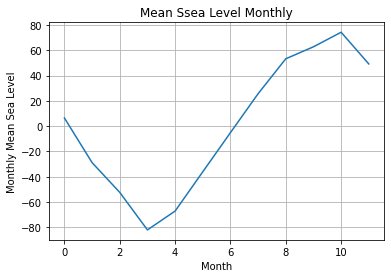

In [23]:
plt.plot(climatology_mean["anomaly"].values)
plt.grid()
plt.xlabel("Month")
plt.ylabel("Monthly Mean Sea Level")
plt.title("Mean Ssea Level Monthly")
plt.show()

In [24]:
climatology_anomaly = copy.copy(data_pro)
for i, a in enumerate(climatology_mean["anomaly"].values):
    climatology_anomaly["anomaly"].values[np.where(climatology_anomaly["month"].values == i+1)[0]] -= a

climatology_anomaly

time  tide  missing data  flag  month  year     anomaly
0    1987.0417  6772             0     0      1  1987 -200.454545
1    1987.1250  6856             0     0      2  1987  -81.151515
2    1987.2083  6825             0     0      3  1987  -88.606061
3    1987.2917  6837             0     0      4  1987  -46.909091
4    1987.3750  6885             0     0      5  1987  -13.818182
..         ...   ...           ...   ...    ...   ...         ...
391  2019.6250  7021             0     0      8  2019   29.333333
392  2019.7083  7069             0     0      9  2019   49.696970
393  2019.7917  7128             0     0     10  2019   99.212121
394  2019.8750  7084             0     0     11  2019   43.696970
395  2019.9583  7121             0     0     12  2019  105.757576

[396 rows x 7 columns]

### LinearRegression

In [25]:
X = np.array([data_pro["time"].values]).T
Y = np.array([data_pro["anomaly"].values]).T
reg_pro = LinearRegression().fit(X, Y)
reg_pro.score(X, Y)

0.07942436246654616

In [26]:
pred_pro = reg_pro.predict(X)

In [27]:

# Create a graph figure object
fig = go.Figure()

# add trace for time series data
# with error details
fig.add_trace(go.Scatter(x=data_pro["time"].values,
                         y=data_pro["anomaly"].values,
                         name="Anomaly"
                         ))

fig.add_trace(go.Scatter(x=X.T[0],
                         y=pred_pro.T[0],
                         name="Linear Fit"
                         ))

# update layout details for graph
fig.update_layout(
    yaxis_title='Anomaly',
    xaxis_title='Time',
    title='Complete Data Tidal anomaly',
)

fig.show()

### Compare trends

In [37]:
# Create a graph figure object
fig = go.Figure()

# add trace for time series data
# with error details
fig.add_trace(go.Scatter(x=data_pro["time"].values,
                         y=pred_pro.T[0],
                         name="Global Trend"
                         ))
# add trace for time series data
# with error details
fig.add_trace(go.Scatter(x=data_pro["time"].values,
                         y=pred_pro.T[0],
                         name="Max Continuous data Trend"
                         ))

# add trace for time series data
# with error details
fig.add_trace(go.Scatter(x=climatology_anomaly["time"].values,
                         y=pred_pro.T[0],
                         name="Climatology Trend"
                         ))

# update layout details for graph
fig.update_layout(
    yaxis_title='Anomaly',
    xaxis_title='Time',
    title='Trend Comparison',
)

fig.show()

## Max Continuous Data Plot

### Perform 5-years mean filtering

In [39]:
# Create a graph figure object
fig = go.Figure()

# add trace for time series data
# with error details
fig.add_trace(go.Scatter(x=data_pro["time"].values,
                         y=data_pro["tide"].values,
                         name="Global Trend"
                         ))

fig.add_trace(go.Scatter(x=data_pro["time"].values,
                         y=new_data,
                         name="5-Years mean"
                         ))

# update layout details for graph
fig.update_layout(
    yaxis_title='Anomaly',
    xaxis_title='Time',
    title='Average filtering',
)

fig.show()

In [40]:
nout = 100000
f = np.linspace(0.01, 10, nout)

In [41]:
pgram = signal.lombscargle(data_pro["time"].values[60:], new_data.values[60:], f, normalize=True)

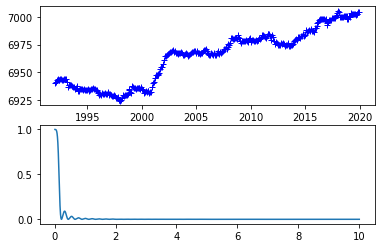

In [42]:
plt.subplot(2, 1, 1)
plt.plot(data_pro["time"].values[60:], new_data.values[60:], 'b+')
plt.subplot(2, 1, 2)
plt.plot(f, pgram)
plt.show()